In [7]:
from PIL import Image
import torch
from tqdm.auto import tqdm
import pickle
from point_e.util.plotting import plot_point_cloud

In [8]:
def load_model(modelfile):
	loaded_model = pickle.load(open(modelfile, 'rb'))
	return loaded_model

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
device

device(type='cuda')

In [9]:
sampler = load_model('sampler.pkl')

In [10]:
# Load an image to condition on.
imgpath = 'pinkchair.jpg'
img = Image.open(imgpath)

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

0it [00:00, ?it/s]

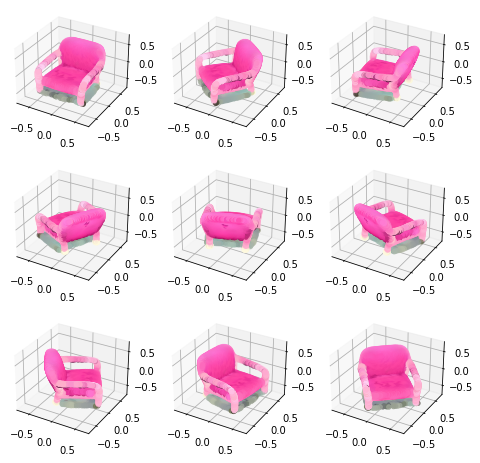

In [11]:
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3)

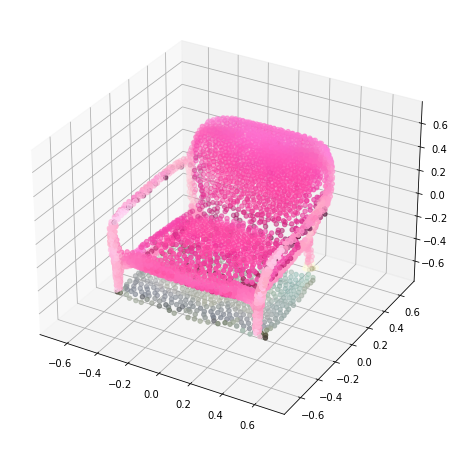

In [12]:
fig1 = plot_point_cloud(pc)